In [1]:
import pandas as pd

#### Load data and filter columns with too many empty values

In [2]:
df = pd.read_csv('Chemical_descriptors.csv', usecols=[2,5,6] + list(range(10,218)), index_col=0)

In [3]:
# remove all columns that have less than 90% of non-zero entries
df = df.loc[:,((df != 0).sum() > df.shape[0] * 0.9)]

In [4]:
df.sample(5)

,mass,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,PEOE_VSA1,SMR_VSA1,SlogP_VSA2,TPSA,HeavyAtomCount,NOCount,NumHAcceptors,NumHeteroatoms,MolLogP,MolMR
name,,,,,,,,,,,,,,,,,,,,,
"6-phospho-D-glucono-1,5-lactone",255.99952,10.860769,-5.260155,10.860769,0.915710,0.335928,256.103,247.031,255.999516,94,...,38.932064,43.726601,52.311635,159.41,16,9,9,10,-4.1602,41.4589
isocitrate(3-),189.00517,10.127546,-2.413981,10.127546,1.141389,0.454460,189.099,184.059,189.005173,74,...,34.809721,34.809721,29.118410,140.62,13,7,7,7,-5.3967,29.1348
succinate,116.01206,9.501528,-1.366481,9.501528,0.469907,0.400490,116.072,112.040,116.012056,46,...,19.802129,19.802129,11.938611,80.26,8,4,4,4,-2.7336,19.2480
ubiquinone-8,726.55871,12.864457,-0.283389,12.864457,0.006398,0.069416,727.127,652.535,726.558711,294,...,9.473726,19.062800,25.786085,52.60,53,4,4,4,14.4009,228.7430
phosphoenolpyruvate,164.96055,9.644167,-5.296096,9.644167,1.214506,0.251464,165.017,163.001,164.960545,58,...,28.776683,28.776683,5.969305,112.55,10,6,6,7,-2.9047,22.8385


#### Analyse the distribution of values for each descriptor

In [5]:
import matplotlib.pyplot as plt

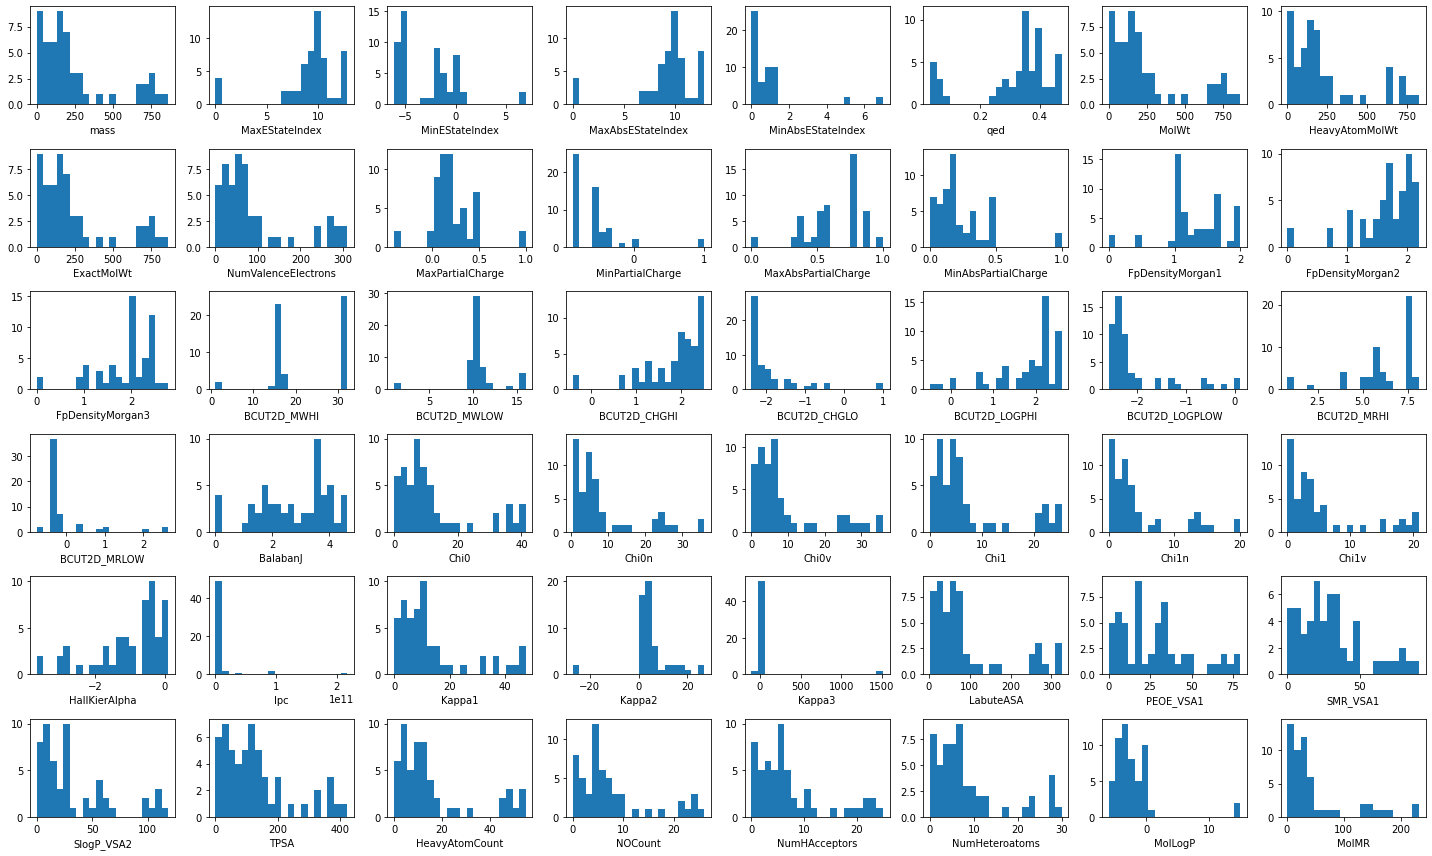

In [6]:
f, axs = plt.subplots(6, 8, figsize=(20, 12))
axs = axs.flatten()

for i in range(48):
    df.iloc[:,i].plot.hist(ax=axs[i], bins=20)
    axs[i].set_xlabel(df.columns[i])
    axs[i].set_ylabel('')
    
f.tight_layout()

#### Estimate Spearman correlation between all pairs of descriptors

In [7]:
from scipy.stats import spearmanr
correlation = [(d1, d2, spearmanr(df.loc[:,d1], df.loc[:,d2])[0]) for d1 in df.columns for d2 in df.columns]

In [8]:
df2 = pd.DataFrame(correlation, columns=['d1', 'd2', 'value'])

In [9]:
df3 = df2.pivot_table(index='d1', columns='d2', values='value')

In [10]:
import seaborn as sns

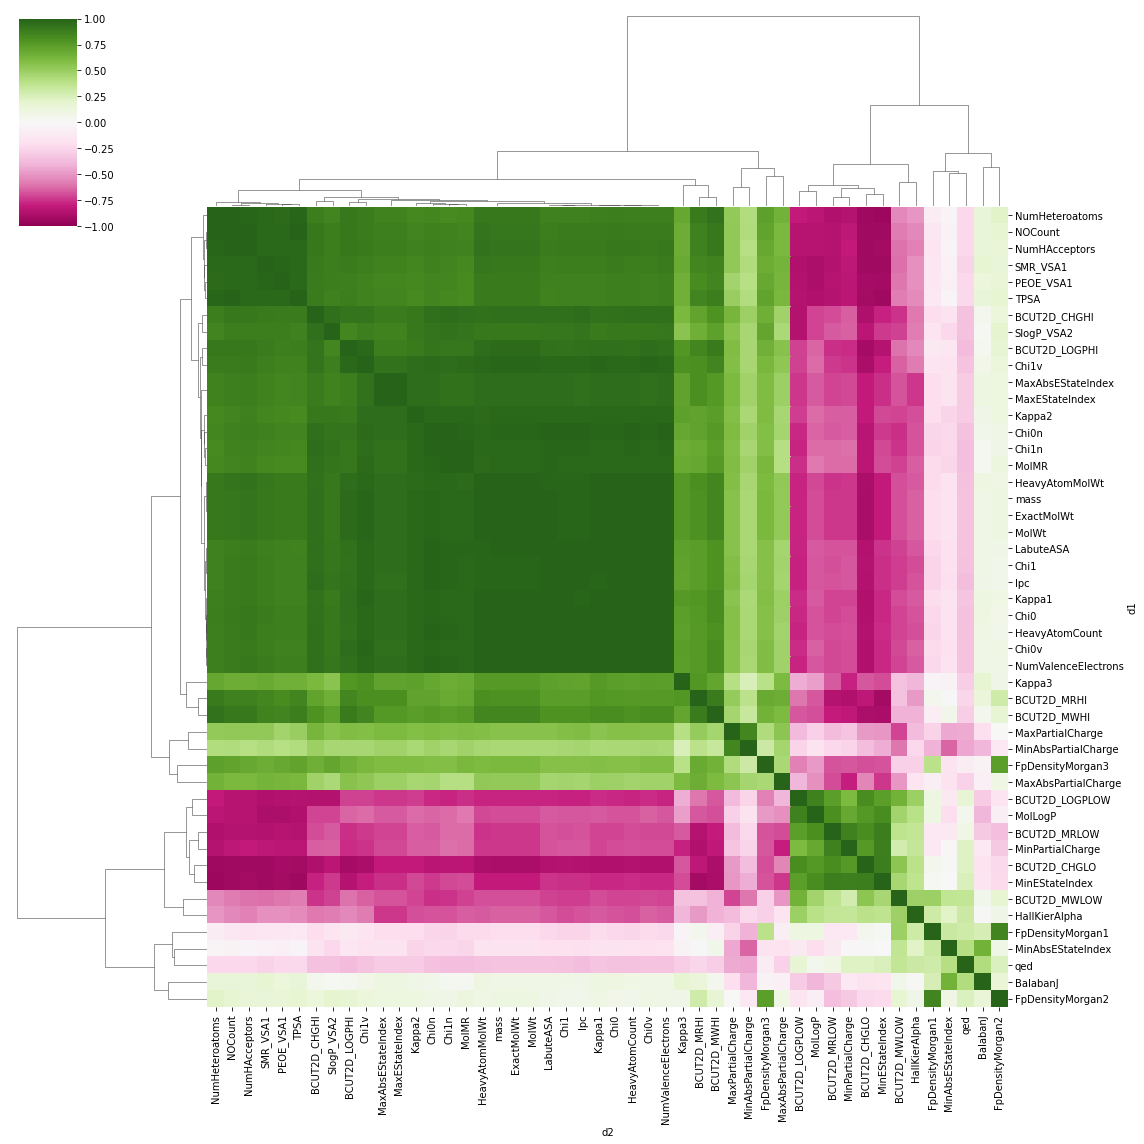

In [11]:
sns.clustermap(df3, vmin=-1, vmax=1, cmap='PiYG', figsize=(16,16))

#### Do scatter plots for pairs of features with low correlation

In [12]:
lowest = df2.query("abs(value) < 0.1 and d1 < d2")  # d1 < d2 is just to avoid plotting (a,b) and (b,a)

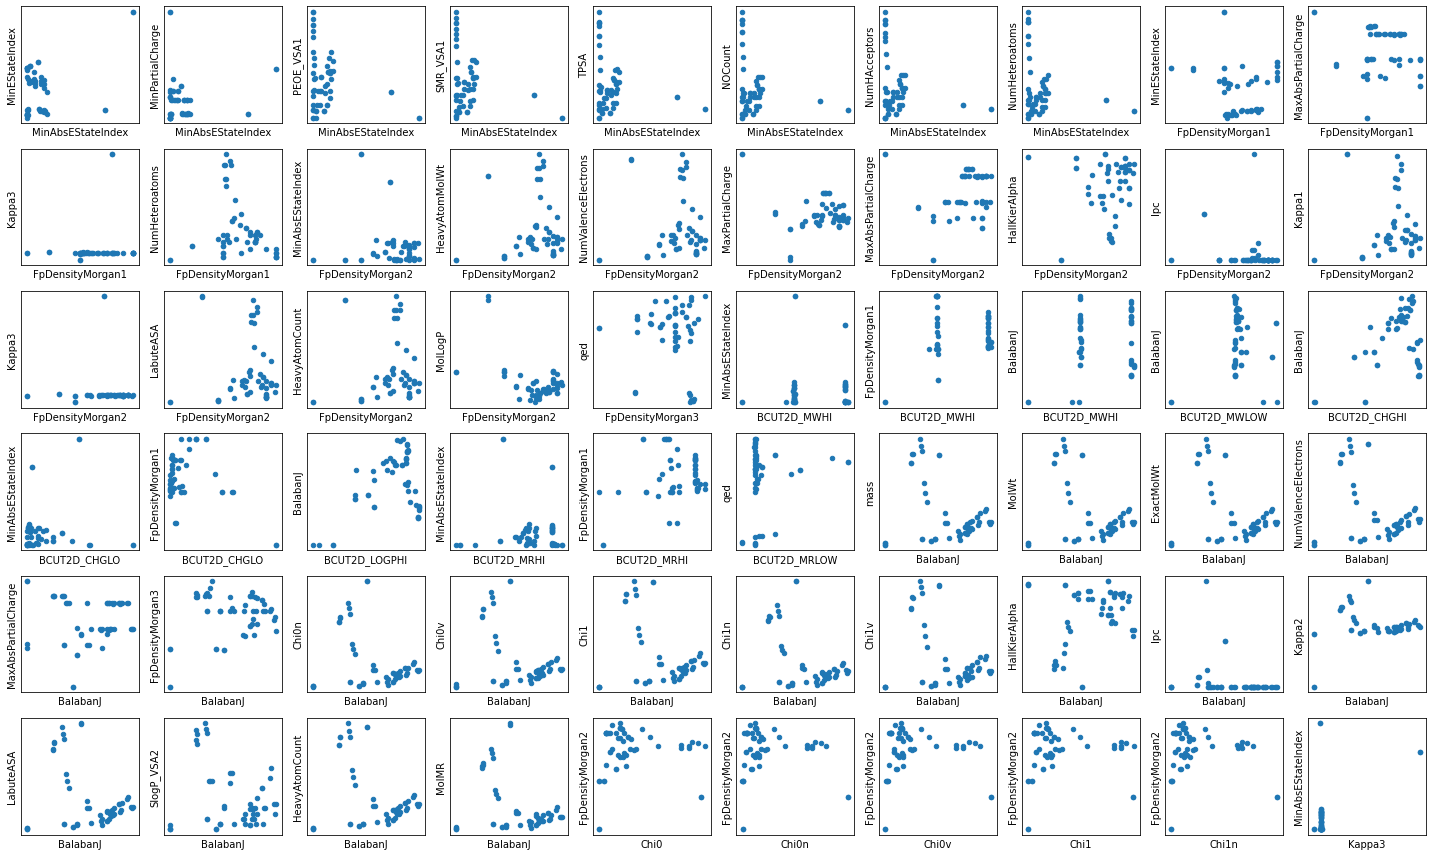

In [13]:
f, axs = plt.subplots(6, 10, figsize=(20, 12))
axs = axs.flatten()

for i in range(60):
    df.plot.scatter(lowest.iloc[i,0], lowest.iloc[i,1], ax=axs[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
f.tight_layout()